In [45]:
import pandas as pd
import numpy as np

In [46]:
df=pd.read_csv('data.csv',sep=';')
df.head(3)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout


In [47]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [48]:
df['Tuition fees up to date'].value_counts()

Tuition fees up to date
1    3896
0     528
Name: count, dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [50]:
df=df.astype({'Marital status':str, 'Application mode':str, 'Application order':str, 'Course':str,
       'Daytime/evening attendance\t':str, 'Previous qualification':str,
       'Previous qualification (grade)':str, 'Nacionality':str,
       "Mother's qualification":str, "Father's qualification":str,
       "Mother's occupation":str, "Father's occupation":str, 'Admission grade':str,
       'Displaced':str, 'Educational special needs':str, 'Debtor':str,
       'Tuition fees up to date':str, 'Gender':str, 'Scholarship holder':str, 'International':str,
       'Curricular units 1st sem (credited)':str,
       'Curricular units 1st sem (enrolled)':str,
       'Curricular units 1st sem (evaluations)':str,
       'Curricular units 1st sem (approved)':str,
       'Curricular units 1st sem (grade)':str,
       'Curricular units 1st sem (without evaluations)':str,
       'Curricular units 2nd sem (credited)':str,
       'Curricular units 2nd sem (enrolled)':str,
       'Curricular units 2nd sem (evaluations)':str,
       'Curricular units 2nd sem (approved)':str,
       'Curricular units 2nd sem (grade)':str,
       'Curricular units 2nd sem (without evaluations)':str
       }) 

In [51]:
string_cols = df.select_dtypes(include='object')
string_cols.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'International', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curri

In [52]:
df['Target'].value_counts()


Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [53]:
df['Target']= df['Target'].replace('Enrolled', 0)
df['Target']= df['Target'].replace('Graduate', 0)
df['Target']= df['Target'].replace('Dropout', 1)

C:\Users\Anshul.kamboj\AppData\Local\Temp\ipykernel_1856\1809904398.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Target']= df['Target'].replace('Dropout', 1)


In [54]:
x=df.drop('Target',axis=1)
y=df['Target']

In [55]:
x.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [57]:
scaler=StandardScaler()

In [58]:
x_scaled=scaler.fit_transform(x)

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,train_size=0.8,random_state=42)

In [61]:
model=RandomForestClassifier()

In [62]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [63]:
y_pred=model.predict(x_test)

In [64]:
pd.DataFrame(y_pred,y_test)

,0
Target,
1,1
0,0
0,0
0,0
1,1
...,...
0,0
1,1
0,0


In [65]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc,accuracy_score

In [66]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

In [67]:
roc_auc = auc(fpr, tpr)
roc_auc

0.8256073279793553

In [68]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.86


C:\Users\Anshul.kamboj\AppData\Local\Temp\ipykernel_1856\840040391.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'r--', linestyle='--', label='No Skill')


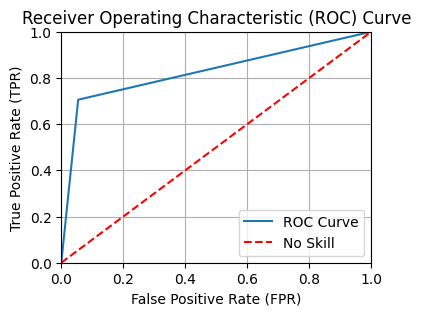

In [69]:
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot([0, 1], [0, 1], 'r--', linestyle='--', label='No Skill')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid(True)
plt.legend()
plt.show()

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [71]:
model=LogisticRegression()

In [72]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [73]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

In [74]:
roc_auc = auc(fpr, tpr)
roc_auc

0.8343974550065626

In [75]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.87


C:\Users\Anshul.kamboj\AppData\Local\Temp\ipykernel_1856\840040391.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'r--', linestyle='--', label='No Skill')


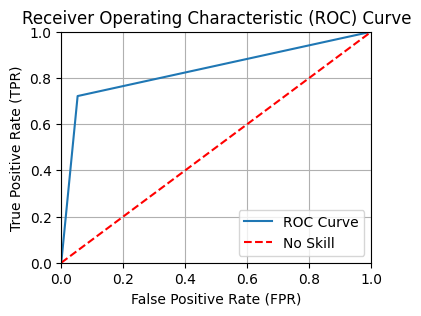

In [76]:
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot([0, 1], [0, 1], 'r--', linestyle='--', label='No Skill')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid(True)
plt.legend()
plt.show()

In [77]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [78]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [79]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr, tpr)
roc_auc

0.7653027741318323

In [80]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.82


C:\Users\Anshul.kamboj\AppData\Local\Temp\ipykernel_1856\840040391.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'r--', linestyle='--', label='No Skill')


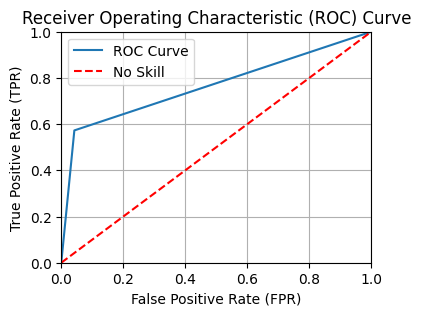

In [81]:
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot([0, 1], [0, 1], 'r--', linestyle='--', label='No Skill')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid(True)
plt.legend()
plt.show()

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [83]:
pipe_knn=Pipeline([('scaler',StandardScaler()),('model',KNeighborsClassifier())])
param_grid={ 'model__n_neighbors': [3, 5, 7],
            'model__metric': ['euclidean', 'manhattan']}

In [84]:
grid_search=GridSearchCV(pipe_knn,param_grid,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__metric': ['euclidean', 'manhattan'],
                         'model__n_neighbors': [3, 5, 7]})

In [85]:
best_model = grid_search.best_estimator_

In [86]:
y_pred = best_model.predict(x_test)

print("Best KNN parameters:", grid_search.best_params_)
#print("Predictions:", predictions)

Best KNN parameters: {'model__metric': 'euclidean', 'model__n_neighbors': 5}


In [87]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr, tpr)
roc_auc

0.7691708749527262

C:\Users\Anshul.kamboj\AppData\Local\Temp\ipykernel_1856\840040391.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'r--', linestyle='--', label='No Skill')


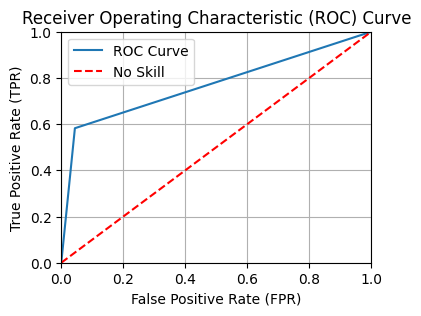

In [88]:
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot([0, 1], [0, 1], 'r--', linestyle='--', label='No Skill')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid(True)
plt.legend()
plt.show()

In [89]:
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)

# Save training and testing data to CSV files
train_data.to_csv('train.csv', index=False)
test_data.to_csv('test.csv', index=False)